In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from stats_tools import auto_stats
import matplotlib.pyplot as plt
from params import *
import ghibtools as gh

## PARAMS

In [3]:
ecg_interesting_metrics = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_pNN20', 'HRV_LF', 'HRV_HF', 'HRV_LFHF']
# ecg_interesting_metrics = ['HRV_RMSSD', 'HRV_S', 'HRV_CSI', 'HRV_CVI']
ppg_interesting_metrics = ['mean amplitude', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_pNN20', 'HRV_LF', 'HRV_HF', 'HRV_LFHF']
eda_interesting_metrics = ['nb_peaks', 'mean_height', 'EDA_Symp', 'EDA_SympN']

In [4]:
outcomes = {
    'eeg':['Hz_30_80', 'Hz_13_30', 'Hz_8_13', 'Hz_4_8', 'Hz_1_4'],
    'ppg': ppg_interesting_metrics,
    'ecg': ecg_interesting_metrics,
    'eda': eda_interesting_metrics
}

In [5]:
predictor = 'room'
subject = 'participant'

In [68]:
savefig = False

In [7]:
remove_participants = {
    'ecg':['P12BOULI','P25PEIAN'],
    'eeg':['P21LIYAT','P27OSTMA','P30BATDI'],
    'eda':[],
    'ppg':[]
}

## TOOLS

In [11]:
def load(dtype,remove_participants=None):
    df = pd.read_excel(f'../metrics/{dtype}_metrics.xlsx').drop(columns = 'Unnamed: 0')
    if dtype == 'eeg': # mean both sides
        df = df.set_index(['participant','room'])
        df_right = df[df['chan'] == 'EEGR']
        df_left = df[df['chan'] == 'EEGL']
        data_right = df_right.drop(columns='chan').values
        data_left = df_left.drop(columns='chan').values
        
        mean_electrodes = (data_right + data_left) / 2
        
        df = pd.DataFrame(data=mean_electrodes, columns = ['Hz_30_80','Hz_13_30','Hz_8_13','Hz_4_8','Hz_1_4'], index=df_right.index).reset_index()
        # df['room'] = df_right['room']
        # df['participant'] = df_right['participant']
        
    if not remove_participants is None:
        df = df[~df['participant'].isin(remove_participants[dtype])]
        
    df_return = df
    return df_return

## GO

- Stastical interactions between metrics

In [12]:
all_metrics = pd.concat([load(dtype).set_index(['participant','room']) for dtype in ['eeg','ecg','eda']], axis = 1)

<AxesSubplot:>

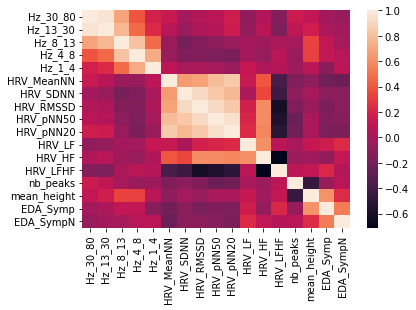

In [13]:
sns.heatmap(all_metrics.corr('spearman'))

In [14]:
all_metrics.rcorr('spearman')

,Hz_30_80,Hz_13_30,Hz_8_13,Hz_4_8,Hz_1_4,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_pNN20,HRV_LF,HRV_HF,HRV_LFHF,nb_peaks,mean_height,EDA_Symp,EDA_SympN
Hz_30_80,-,***,***,***,,,,,,,,,,,,,
Hz_13_30,0.966,-,***,***,*,,,,,,,,,,,,
Hz_8_13,0.691,0.771,-,***,***,,,,,,,,,,**,,
Hz_4_8,0.391,0.459,0.816,-,***,,,,,,,,,,**,,
Hz_1_4,0.184,0.228,0.472,0.724,-,,,,,,,,,,,,
HRV_MeanNN,0.135,0.066,-0.053,-0.06,0.082,-,***,***,***,***,,***,***,,,*,**
HRV_SDNN,-0.018,-0.054,-0.194,-0.16,-0.002,0.648,-,***,***,***,,***,***,,,,
HRV_RMSSD,0.043,0.02,-0.142,-0.153,0.013,0.685,0.916,-,***,***,*,***,***,,,,
HRV_pNN50,0.072,0.056,-0.103,-0.169,-0.009,0.784,0.837,0.917,-,***,**,***,***,**,,,
HRV_pNN20,0.156,0.145,-0.051,-0.173,-0.051,0.849,0.767,0.846,0.948,-,**,***,***,*,,,


Cerveau : 
- Delta & Theta vs Alpha vs Beta & Gamma

Coeur : 
- Time : RMSSD & SDNN & pNN50 = same ?
- Freq : LFHF anticorr avec time ? 


Cross :
- Beta & Gamma varient à l'inverse de la variabilité cardiaque
- LFHF corr à nb_peaks eda qui sont à l'inverse de variabilité cardiaque
- Gamma & EDA_Symp anticorr


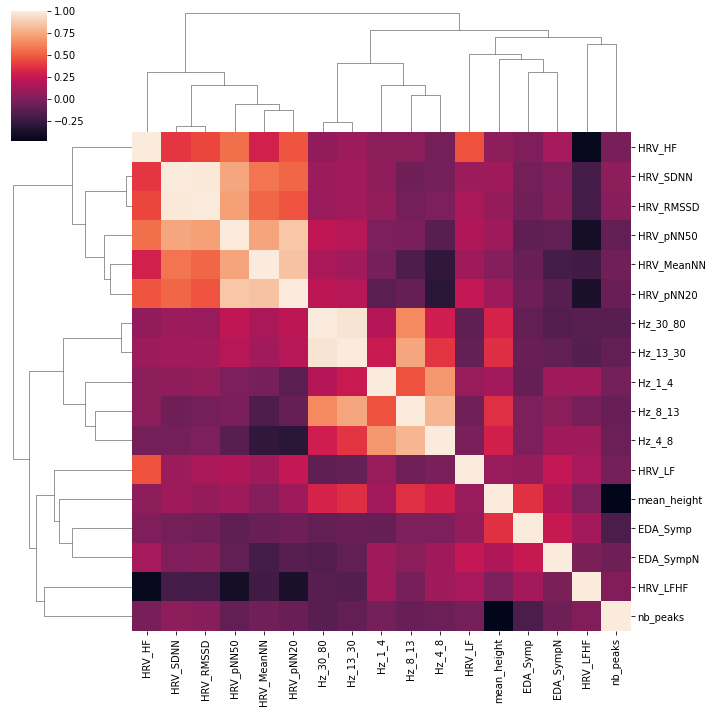

In [15]:
sns.clustermap(all_metrics.corr('pearson'))

In [26]:
ecg_metrics = load('ecg')

<AxesSubplot:xlabel='room'>

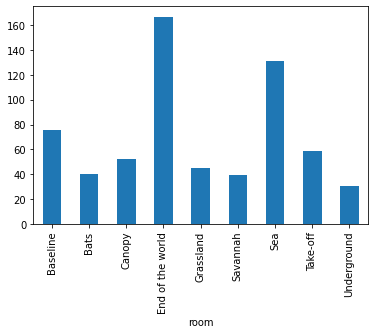

In [27]:
ecg_metrics.groupby('room').mean()['HRV_RMSSD'].plot.bar()

In [28]:
outcomes['ecg']

['HRV_MeanNN',
 'HRV_SDNN',
 'HRV_RMSSD',
 'HRV_pNN50',
 'HRV_pNN20',
 'HRV_LF',
 'HRV_HF',
 'HRV_LFHF']

In [29]:
ecg_metrics

,participant,room,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_pNN20,HRV_LF,HRV_HF,HRV_LFHF
0,P01PPILNI,Baseline,781.649123,69.177338,41.982719,19.298246,54.385965,0.009352,0.008143,1.148484
1,P01PPILNI,Take-off,674.333333,66.195254,37.107642,6.060606,20.454545,0.004123,0.001830,2.252854
2,P01PPILNI,Savannah,719.548387,55.646292,27.522053,3.225806,20.161290,0.006109,0.001410,4.330836
3,P01PPILNI,Canopy,724.422764,49.675176,16.678247,0.813008,17.886179,0.048023,0.002688,17.866844
4,P01PPILNI,Bats,693.093750,40.800540,13.580904,0.000000,9.375000,0.011130,0.002218,5.018503
...,...,...,...,...,...,...,...,...,...,...
157,P30BATDI,Bats,744.235294,54.984236,19.592458,2.521008,23.529412,0.038689,0.001034,37.406946
158,P30BATDI,Underground,900.000000,42.688998,22.274760,1.020408,34.693878,0.032671,0.013650,2.393536
159,P30BATDI,Grassland,867.844660,59.366386,24.526896,3.883495,36.893204,0.015564,0.001905,8.169747
160,P30BATDI,Sea,762.172414,47.476544,23.273048,4.310345,31.896552,0.035776,0.004001,8.942277


Text(0.5, 1.0, 'Effect of room on HRV_RMSSD : **** \n N = 18 * 9 \n friedman : p-0.0')

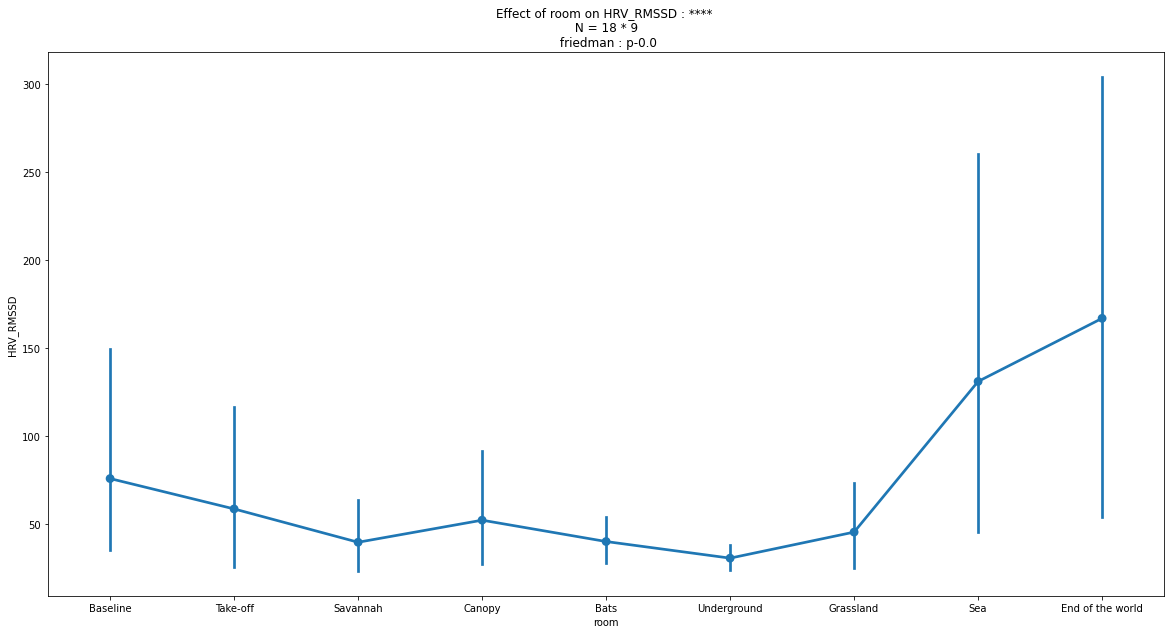

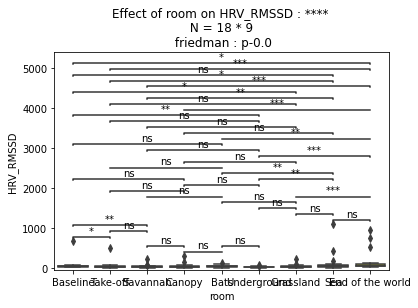

In [30]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=ecg_metrics, x='room',y='HRV_RMSSD', ax=ax)
title = gh.auto_stats(df=ecg_metrics, predictor = 'room', outcome = 'HRV_RMSSD', subject = 'participant', transform = False).get_title()
ax.set_title(title)
# plt.savefig('../figures/pointplot_rmssd')

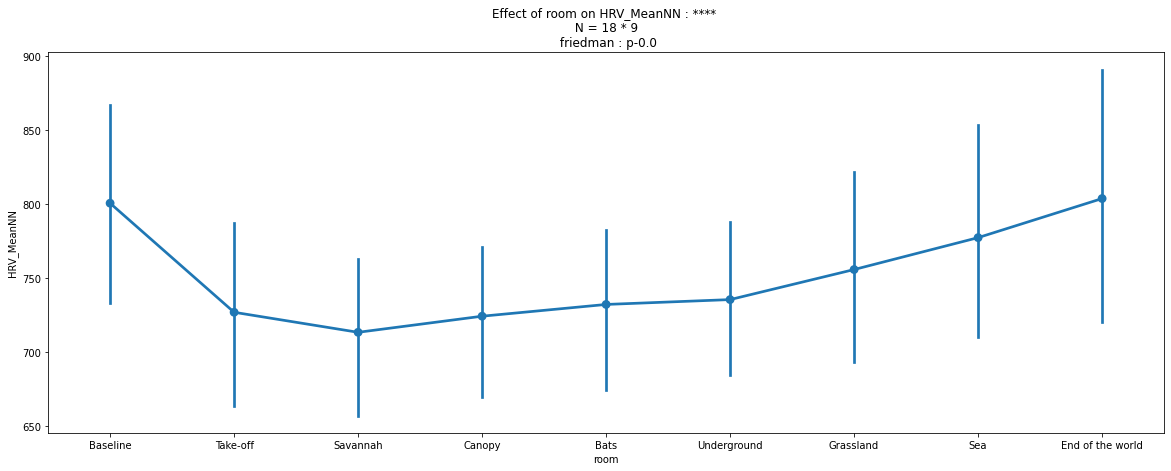

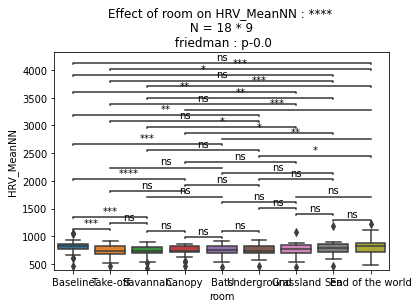

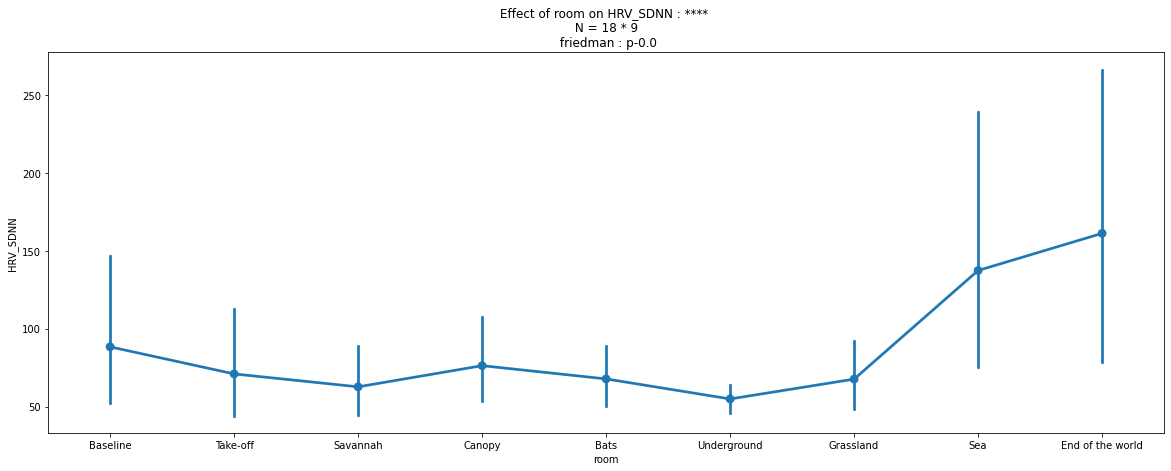

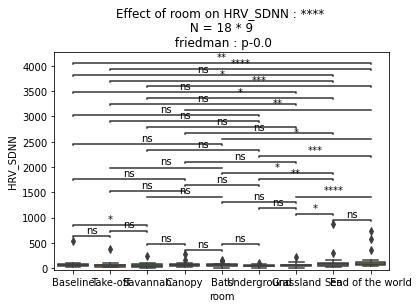

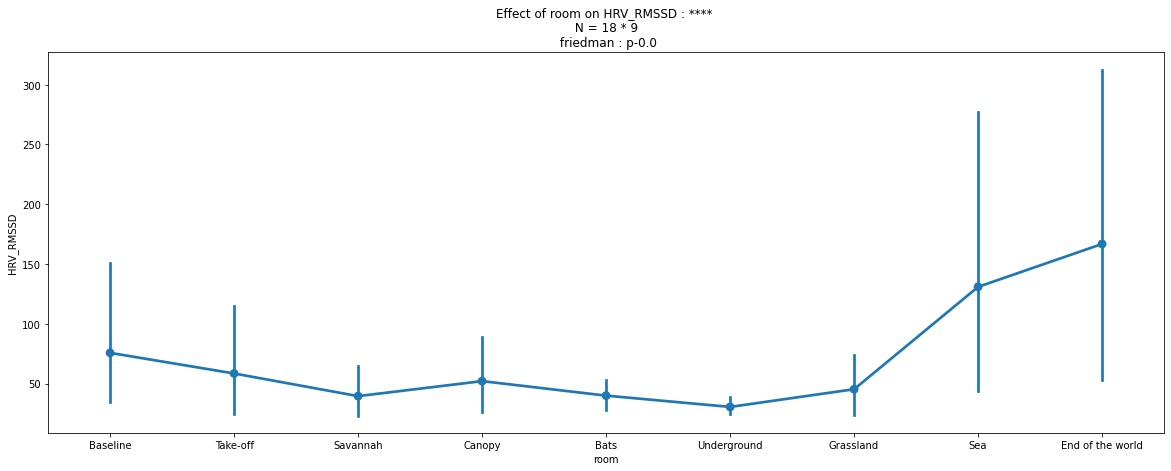

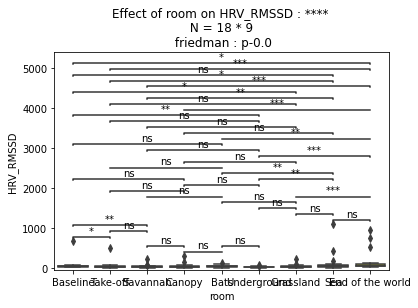

/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact 

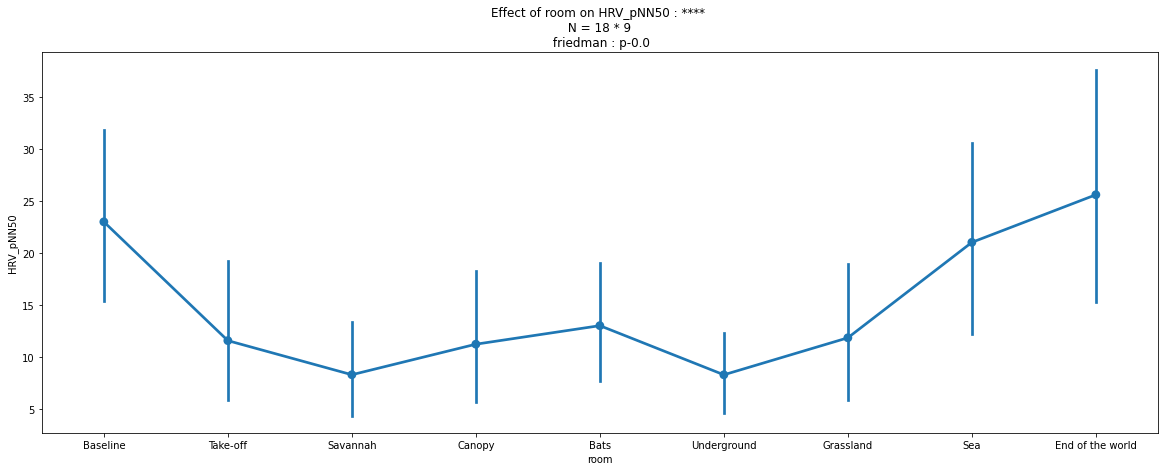

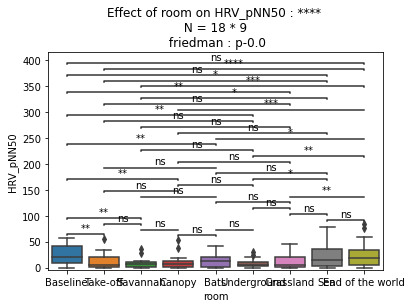

/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


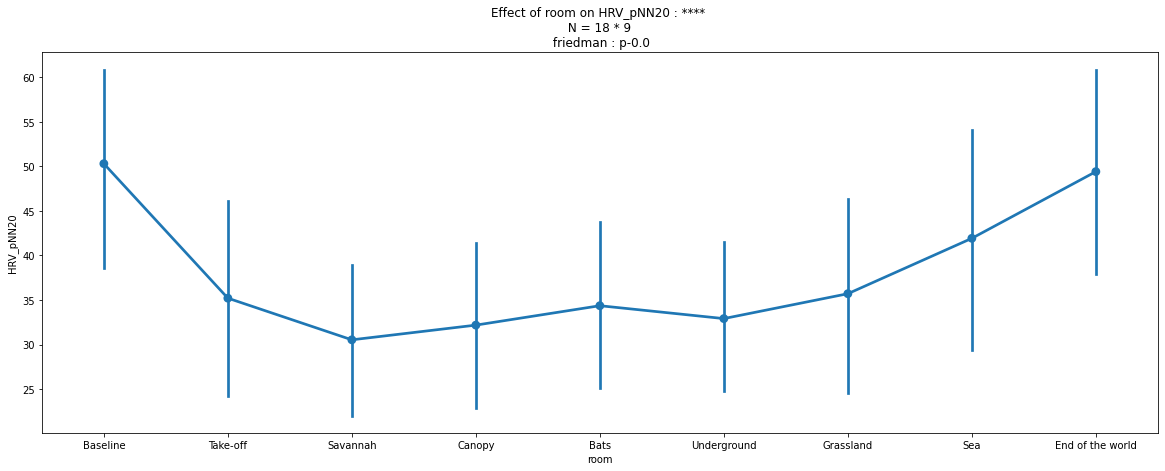

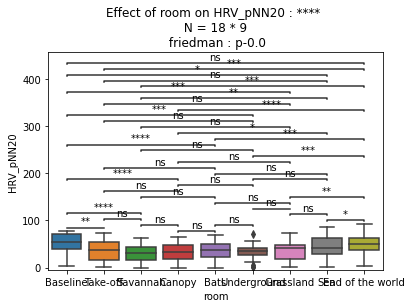

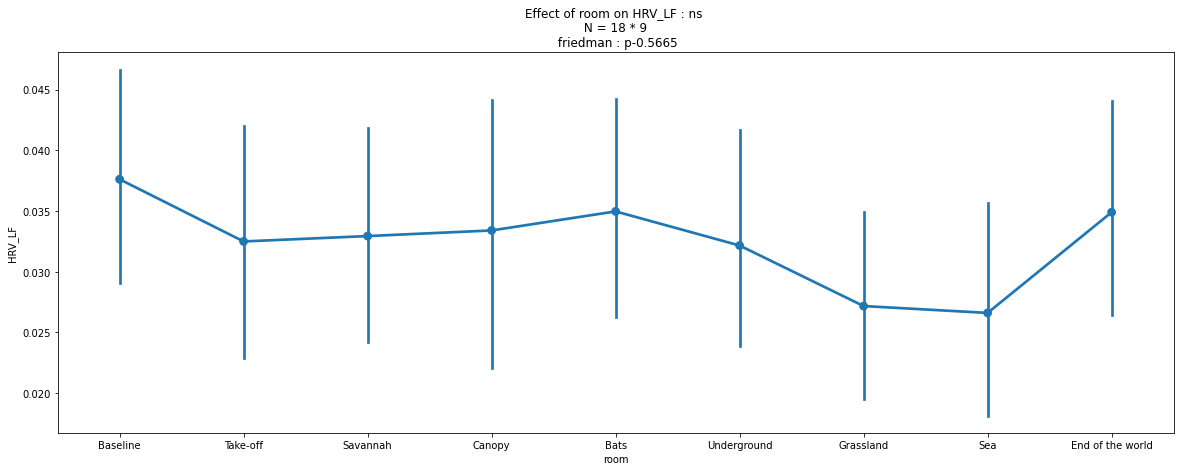

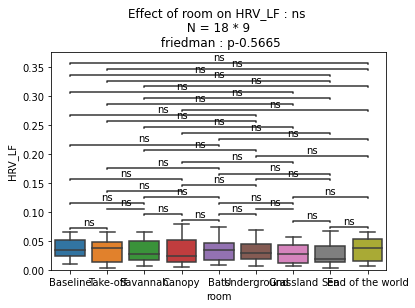

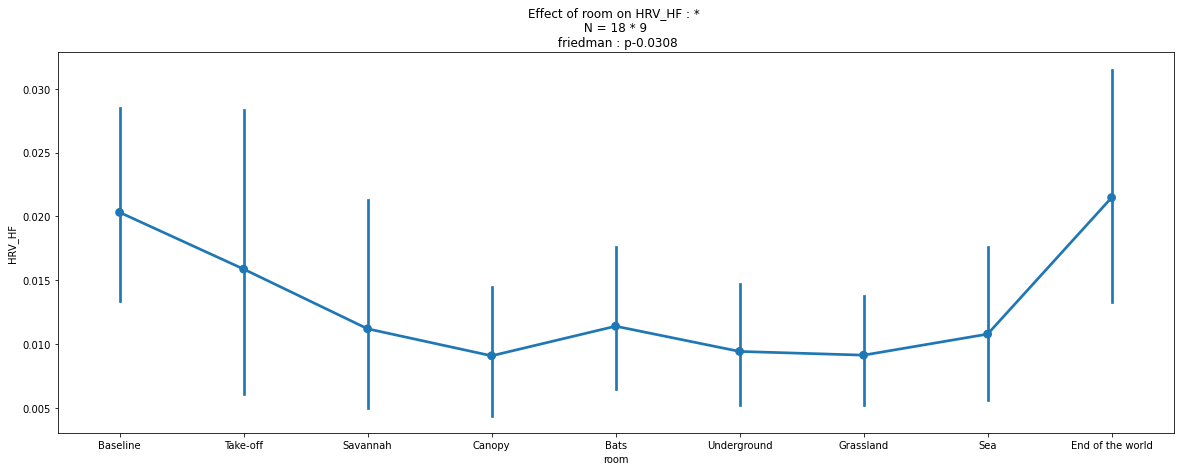

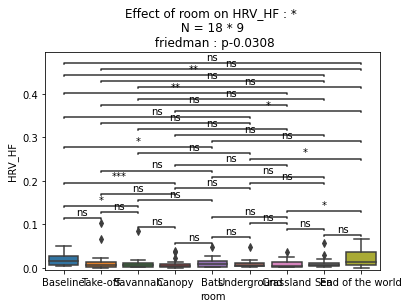

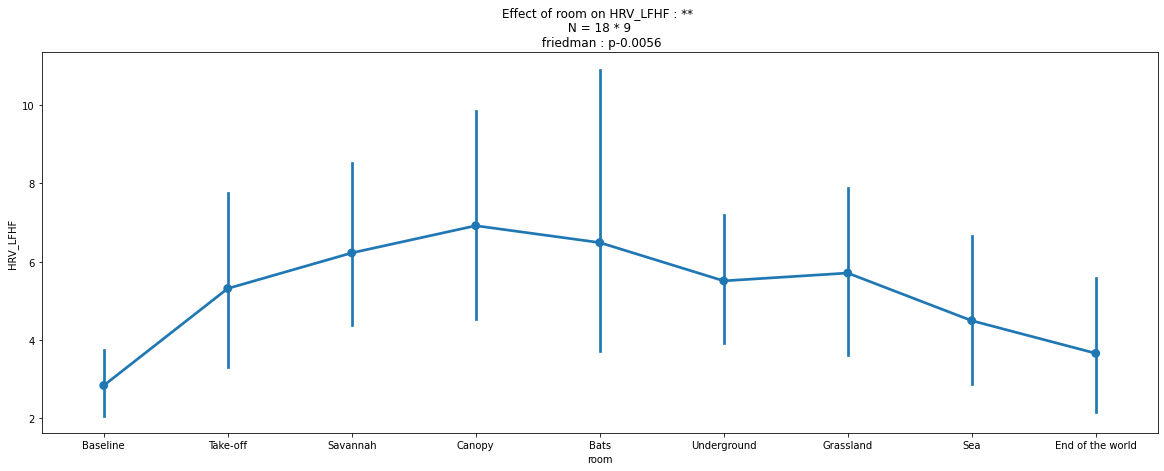

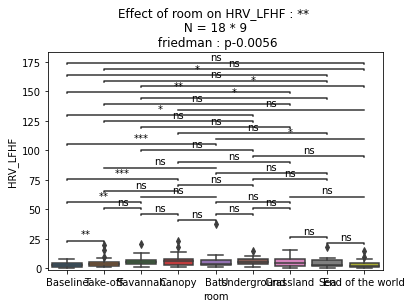

In [31]:
for outcome in outcomes['ecg']:
    fig, ax = plt.subplots(figsize = (20,7))
    title = gh.auto_stats(df=ecg_metrics, predictor = 'room', outcome = outcome, subject = 'participant', transform = False).get_title()
    sns.pointplot(x="room", y=outcome, data=ecg_metrics, ax=ax)
    ax.set_title(title)
    plt.show()

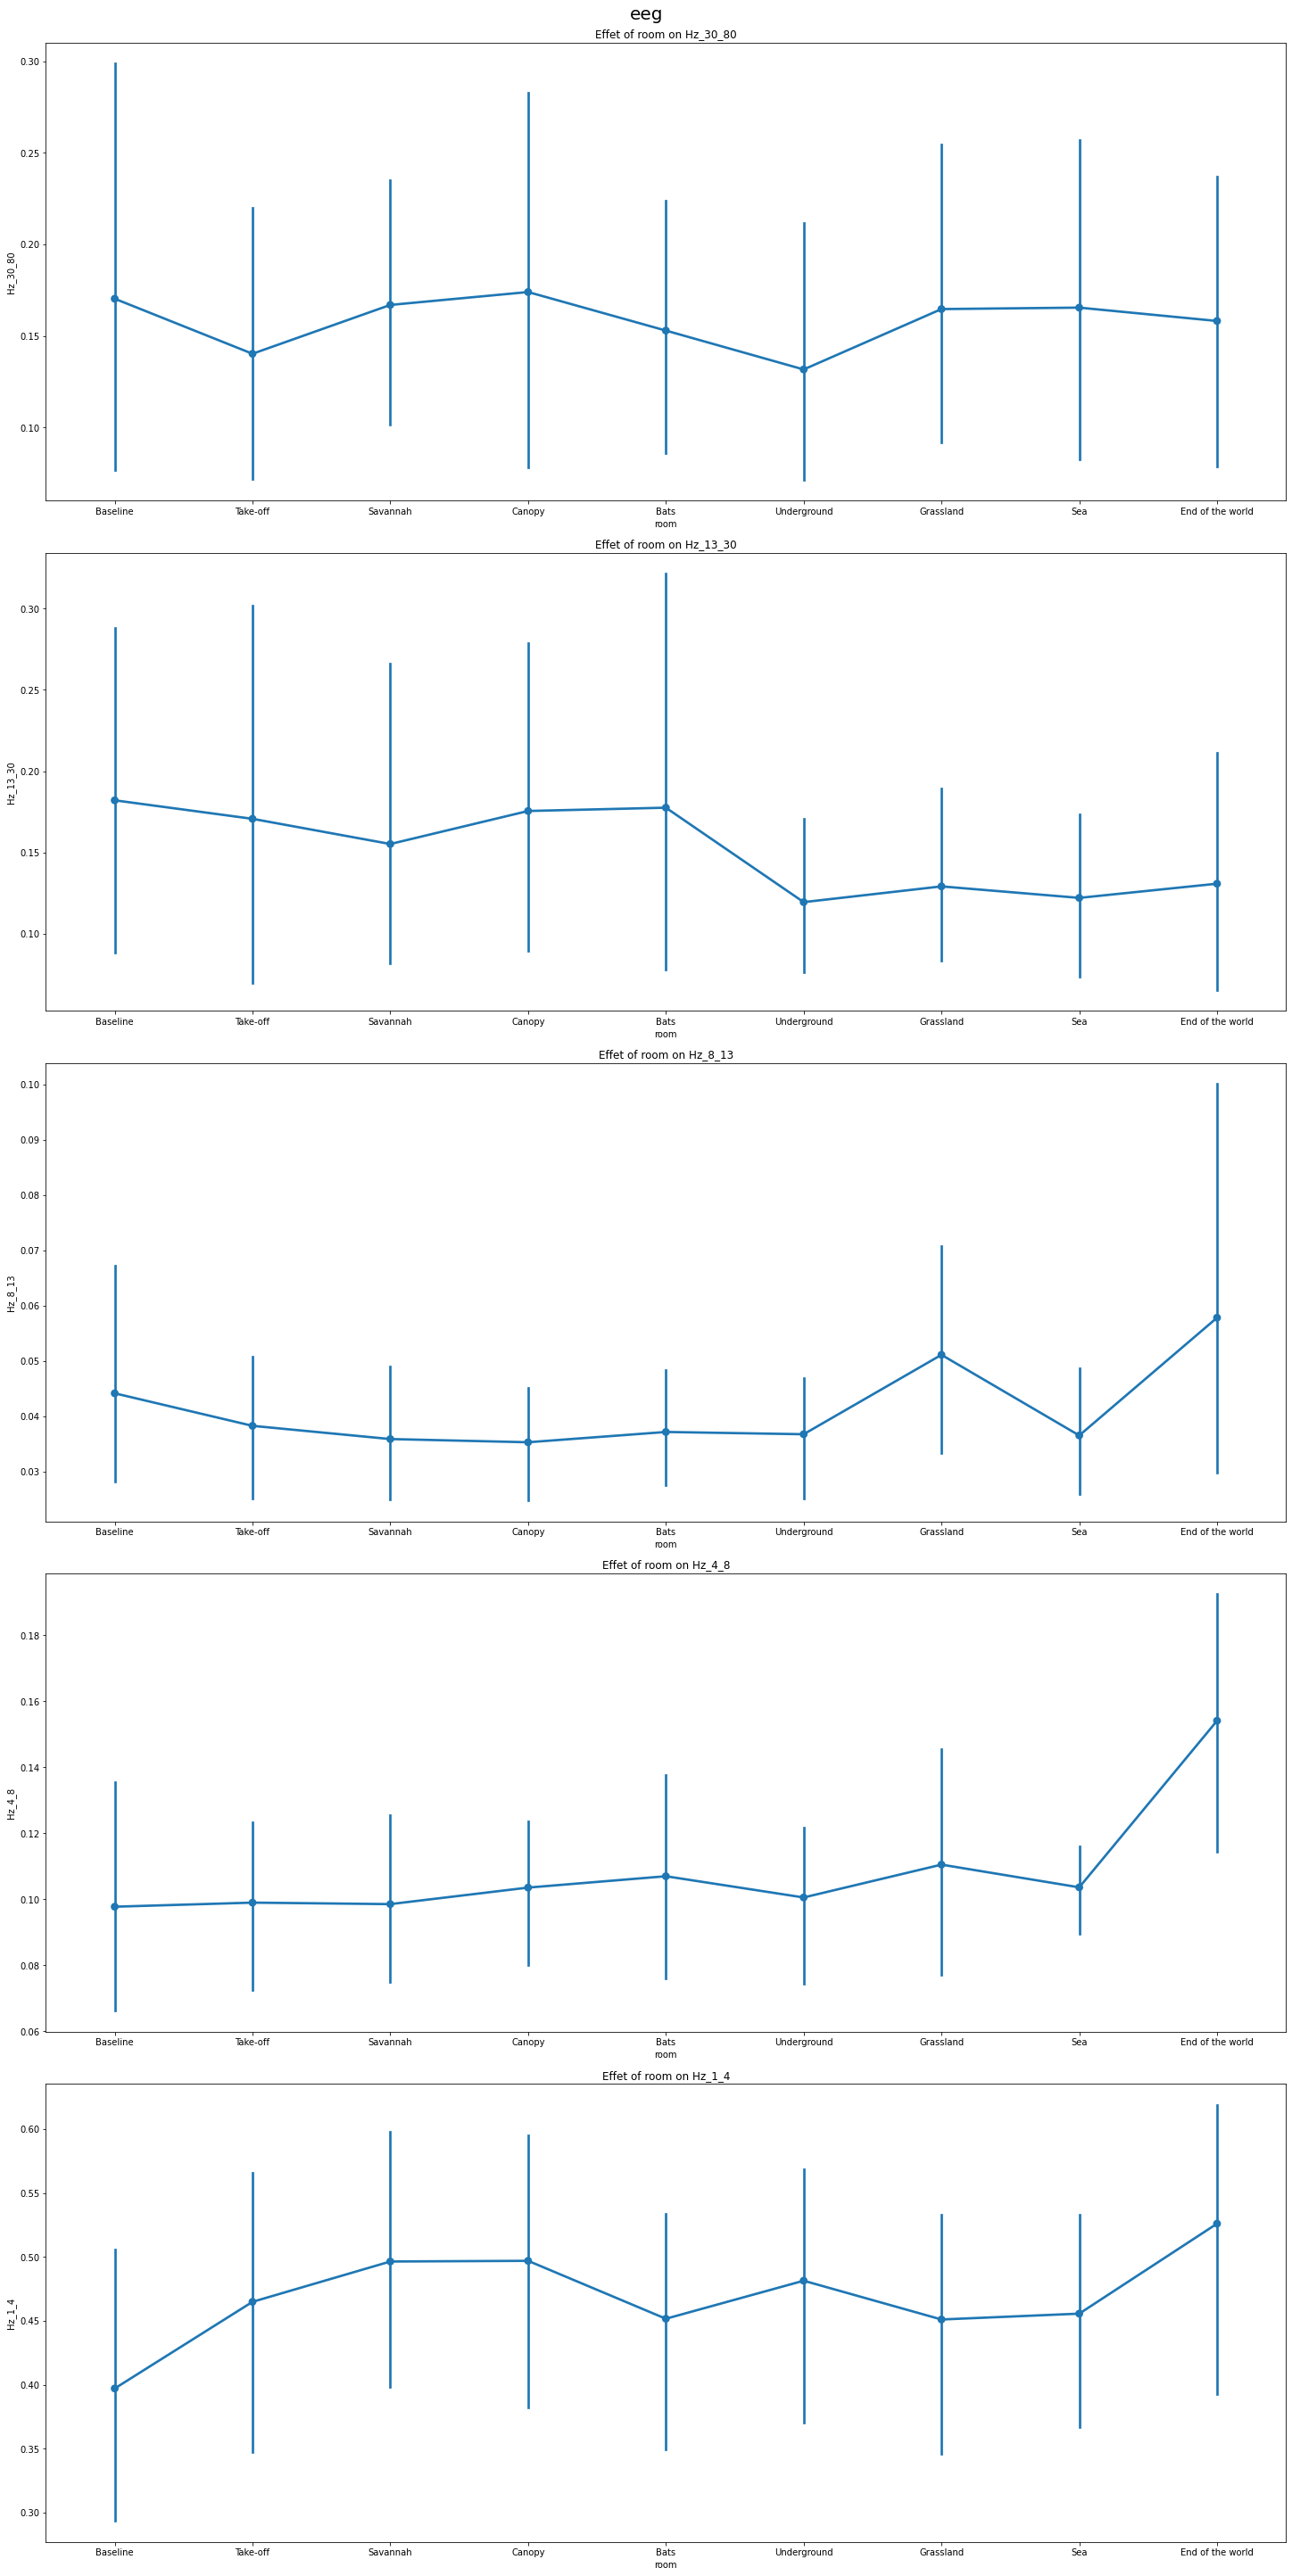

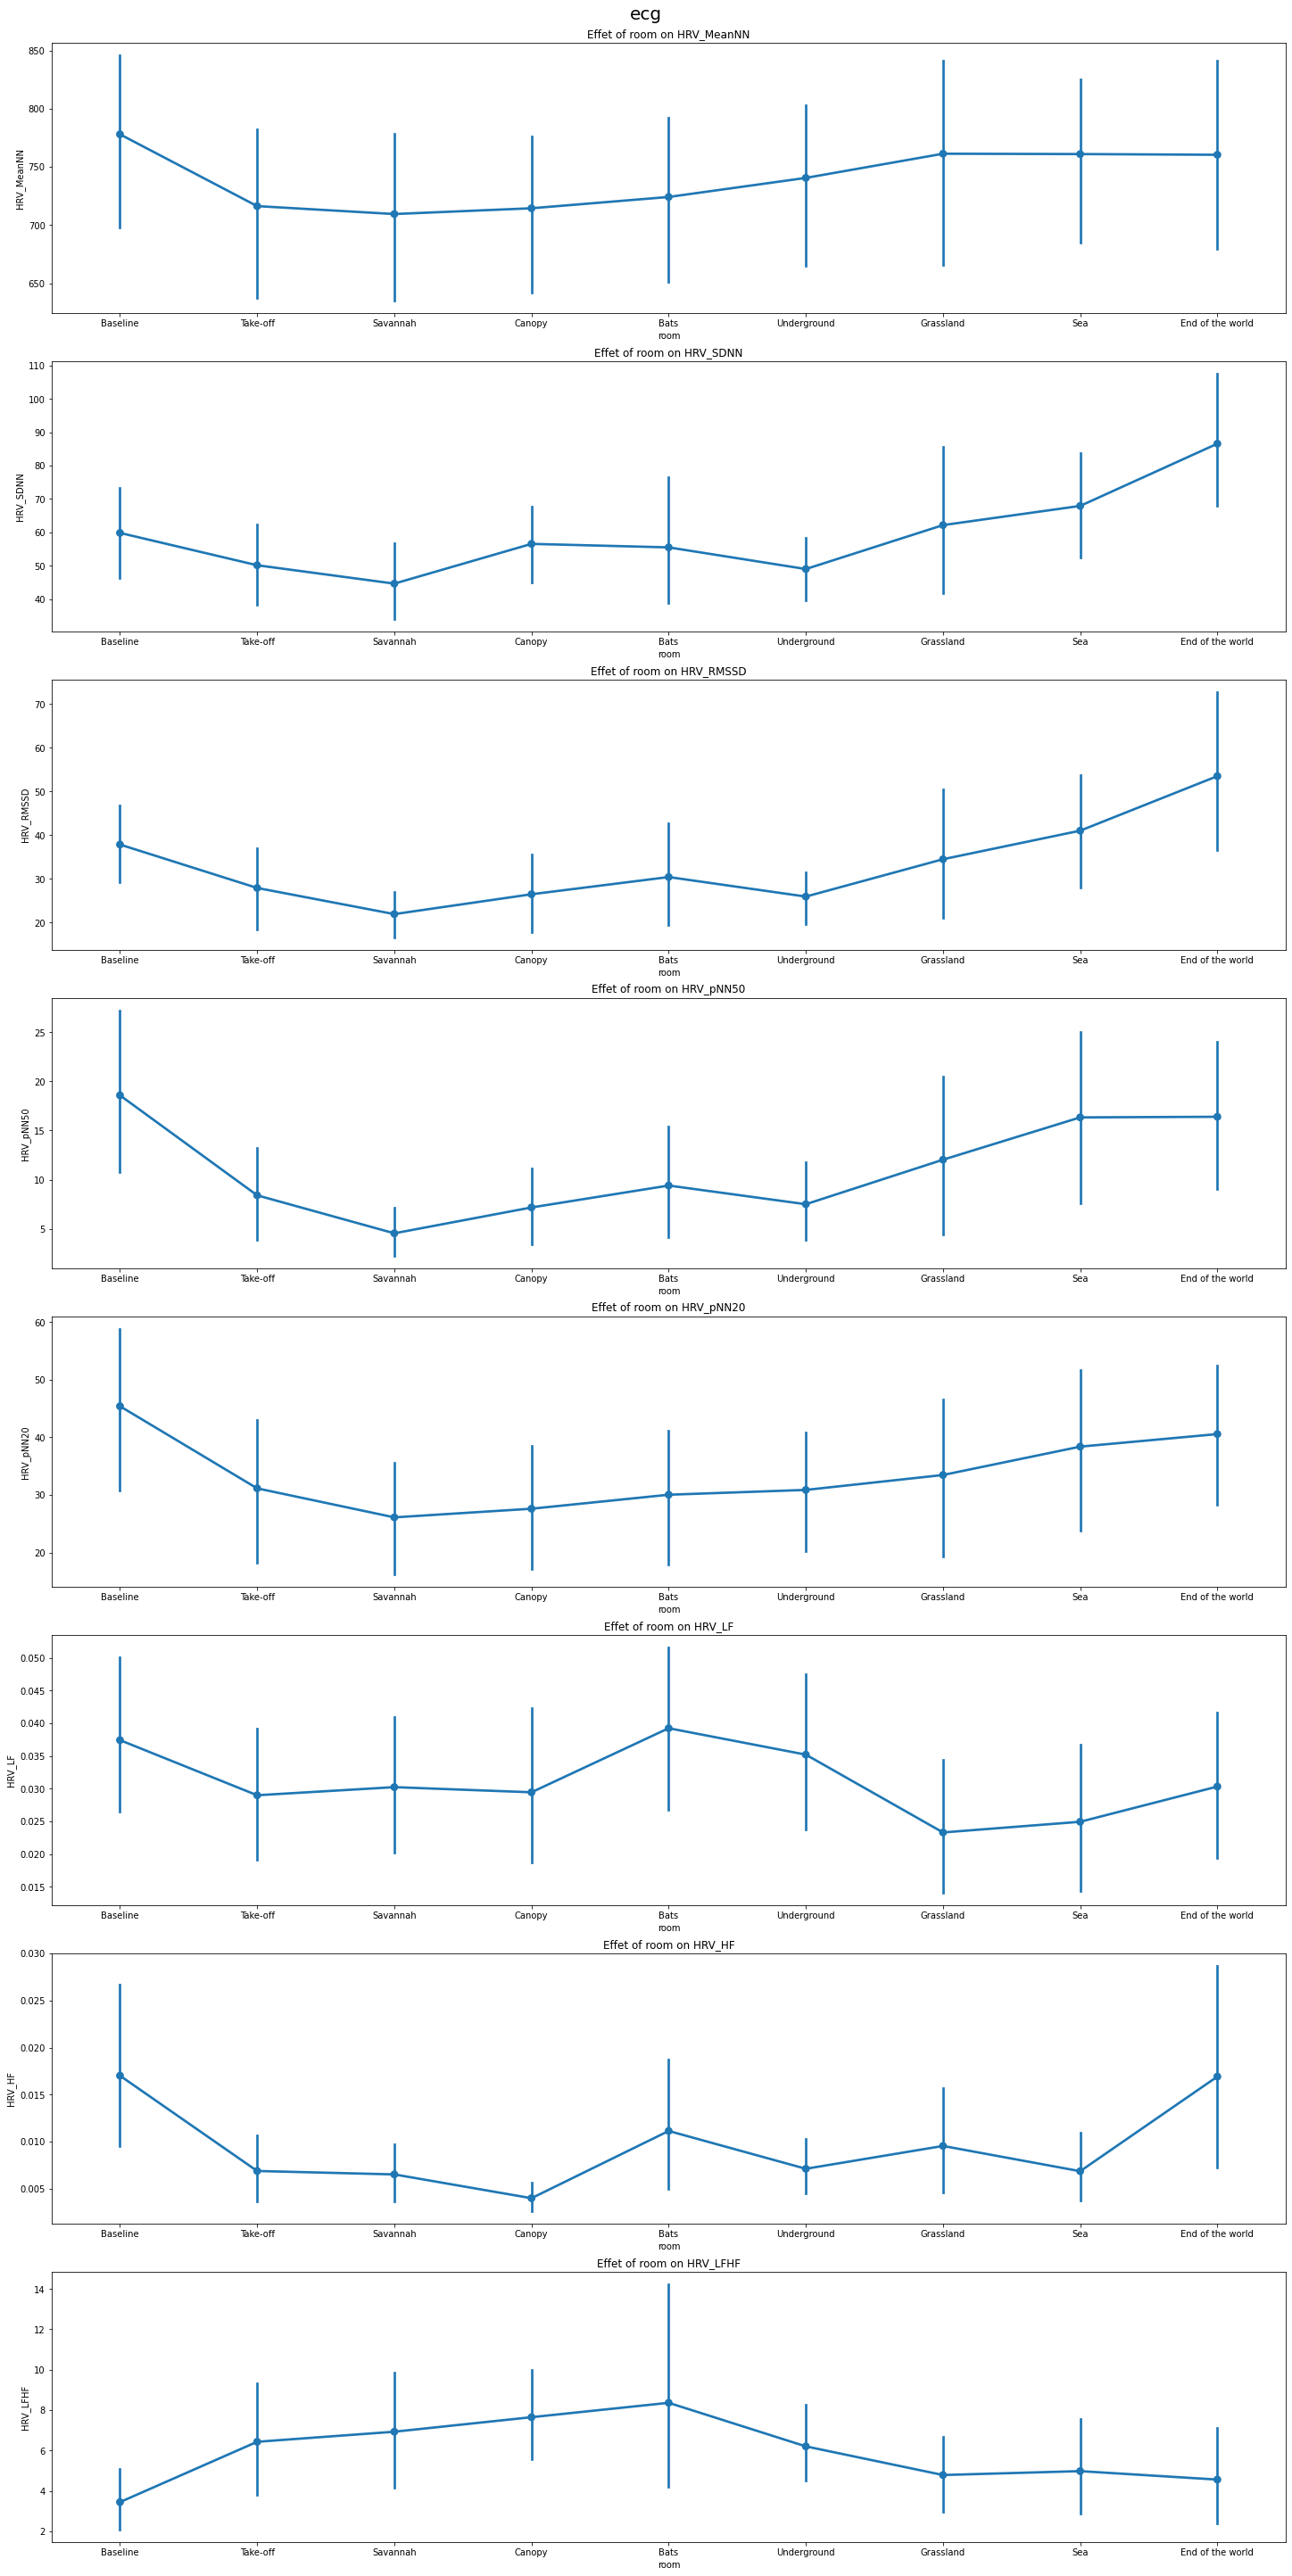

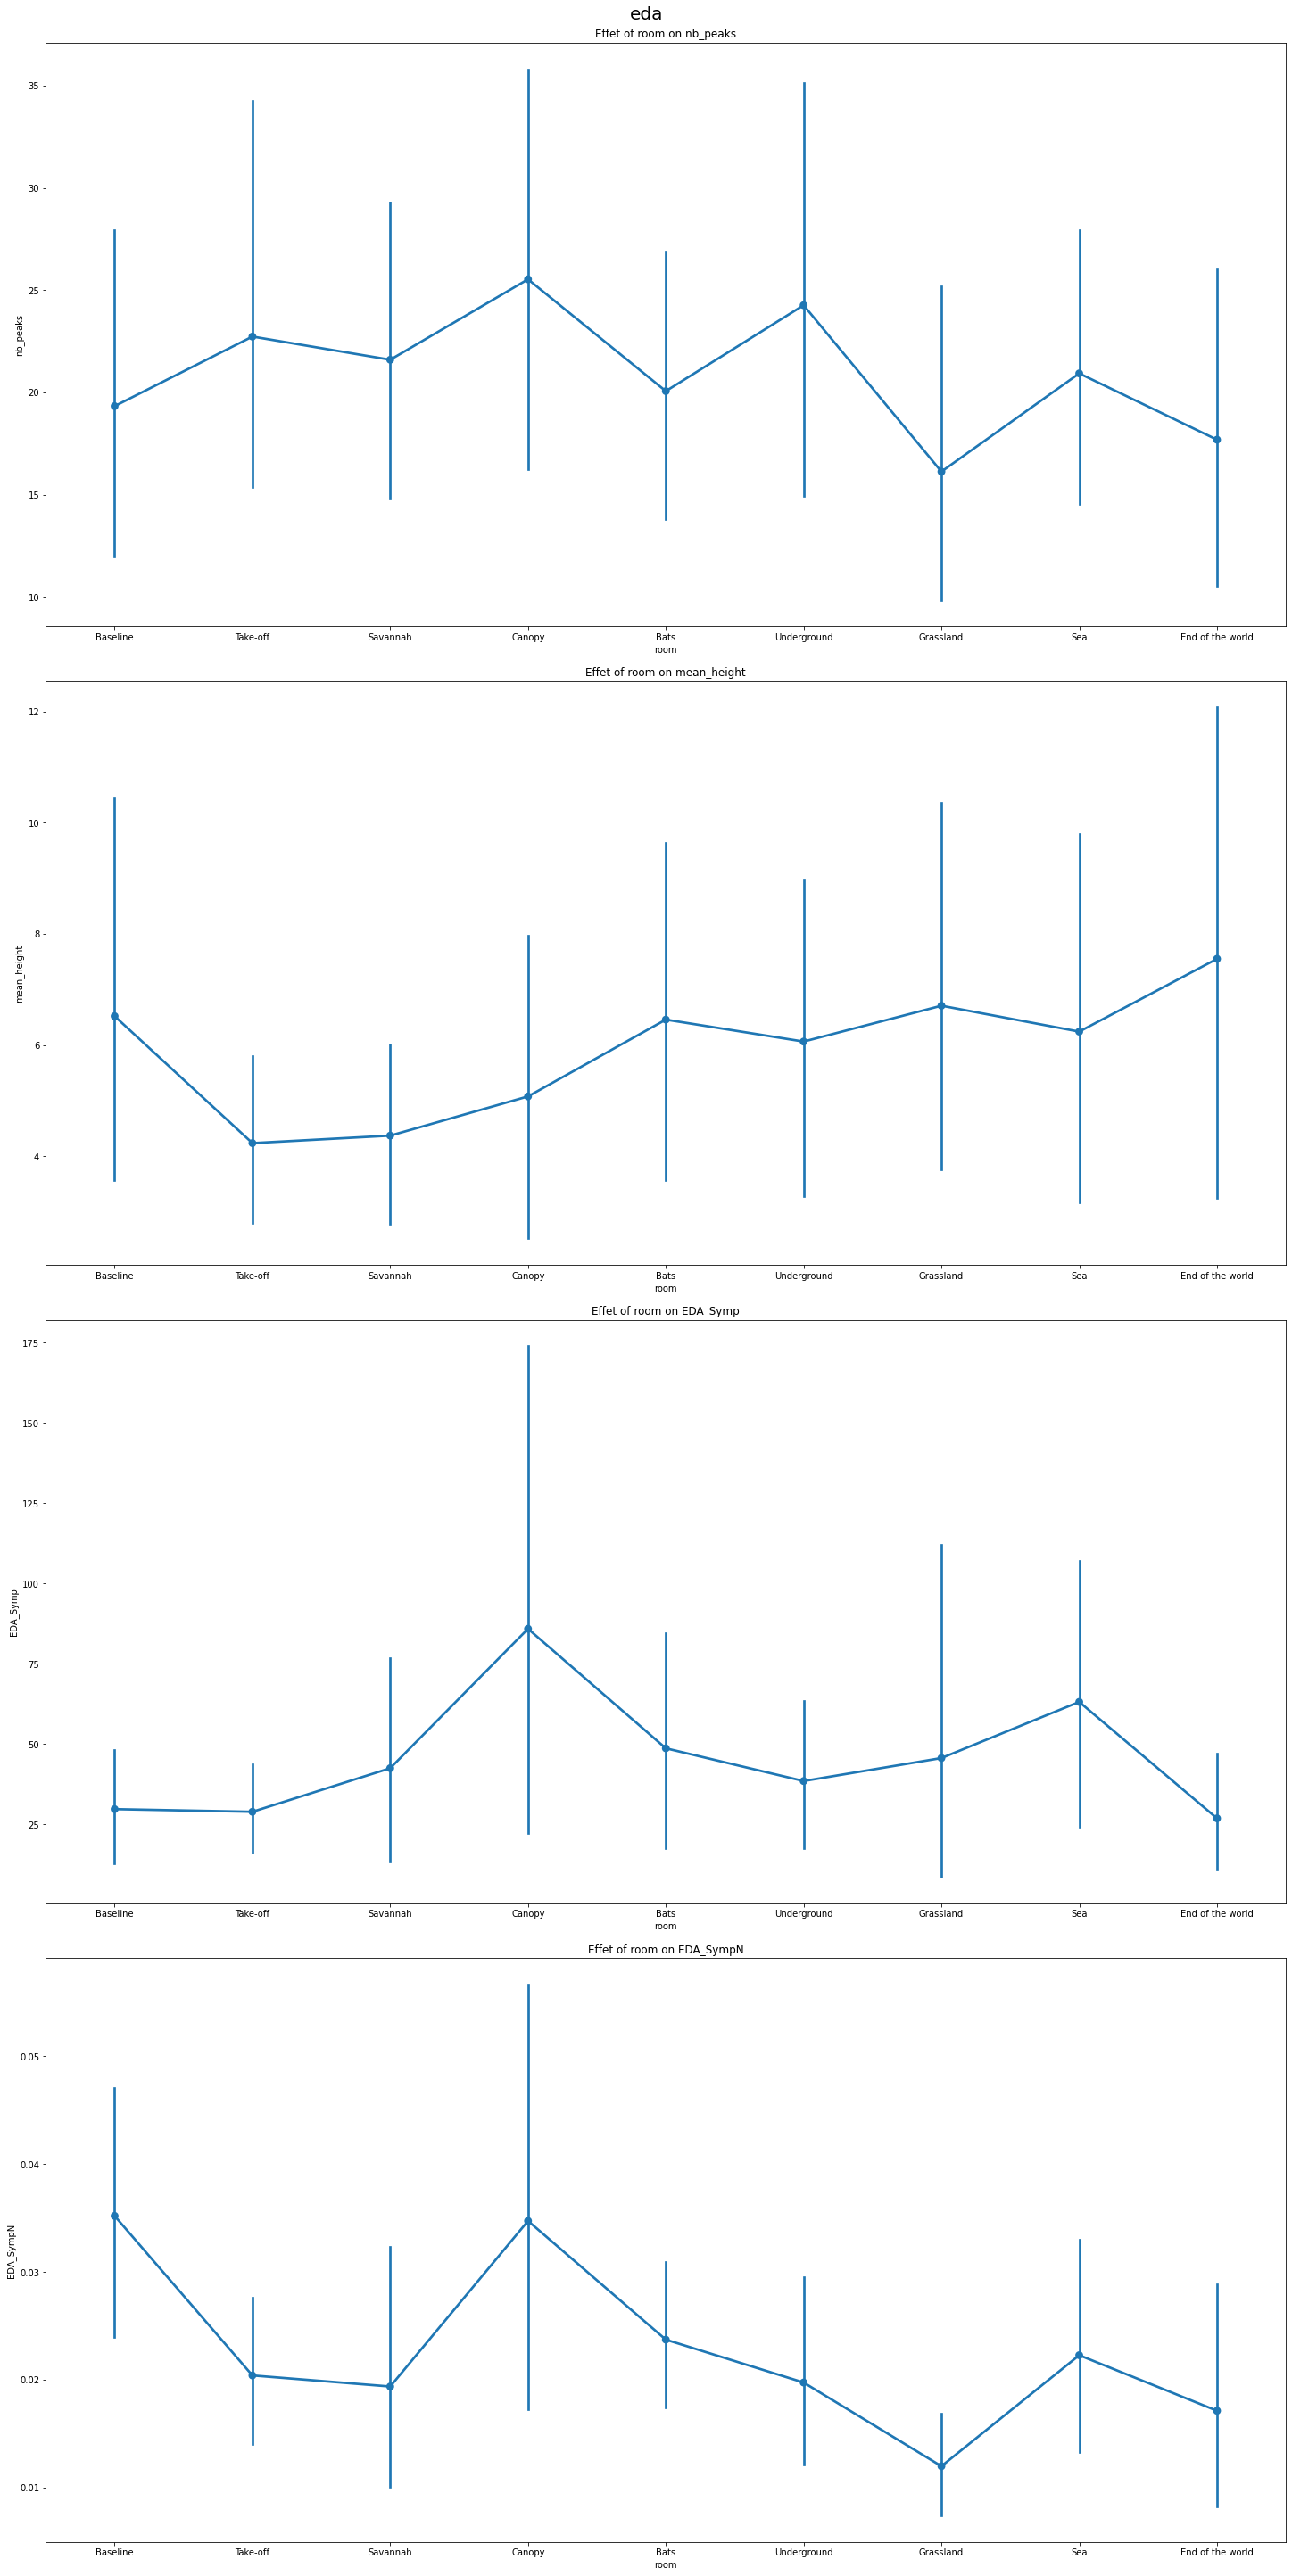

In [23]:
for dtype in ['eeg','ecg','eda']:
    df = load(dtype)
    loop_outcomes = outcomes[dtype]
    fig, axs = plt.subplots(nrows = len(loop_outcomes), figsize = (20,40), constrained_layout = True)
    fig.suptitle(f'{dtype}', fontsize = 20)
    for row, outcome in enumerate(loop_outcomes):
        ax = axs[row]
        sns.pointplot(data=df , x=predictor , y = outcome, ax = ax)
        ax.set_title(f'Effet of {predictor} on {outcome}')
    if savefig:
        plt.savefig(f'../stats/figs/boxplot_{dtype}')
    plt.show()

- Globalement les participants semblent quitter la visite dans le même état physiologique que dans lequel ils sont rentrés, notamment car end of the world rattrape les effets de savannah & canopy & underground qui ont stressés nos participants

In [32]:
def load_visit_effect(dtype):
    df = pd.read_excel(f'../metrics/{dtype}_metrics_visit.xlsx').drop(columns = 'Unnamed: 0')
    if dtype == 'eeg': # mean both sides
        df = df.set_index(['participant','epoch'])
        df_right = df[df['chan'] == 'EEGR']
        df_left = df[df['chan'] == 'EEGL']
        data_right = df_right.drop(columns='chan').values
        data_left = df_left.drop(columns='chan').values
        
        mean_electrodes = (data_right + data_left) / 2
        
        df = pd.DataFrame(data=mean_electrodes, columns = ['Hz_30_80','Hz_13_30','Hz_8_13','Hz_4_8','Hz_1_4'], index=df_right.index).reset_index()
        # df['room'] = df_right['room']
        # df['participant'] = df_right['participant']
        
    df_return = df
    return df_return

Un-successfull transformation
Un-successfull transformation
Successfull transformation


/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:2594: RuntimeWarning: invalid value encountered in subtract
  numer = (Ntot - k) * np.sum(Ni * (Zbari - Zbar)**2, axis=0)
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:2599: RuntimeWarning: invalid value encountered in subtract
  dvar += np.sum((Zij[i] - Zbari[i])**2, axis=0)


Un-successfull transformation
Successfull transformation
Successfull transformation
Successfull transformation
Successfull transformation
Successfull transformation
Un-successfull transformation
Un-successfull transformation
Un-successfull transformation
Un-successfull transformation
Successfull transformation


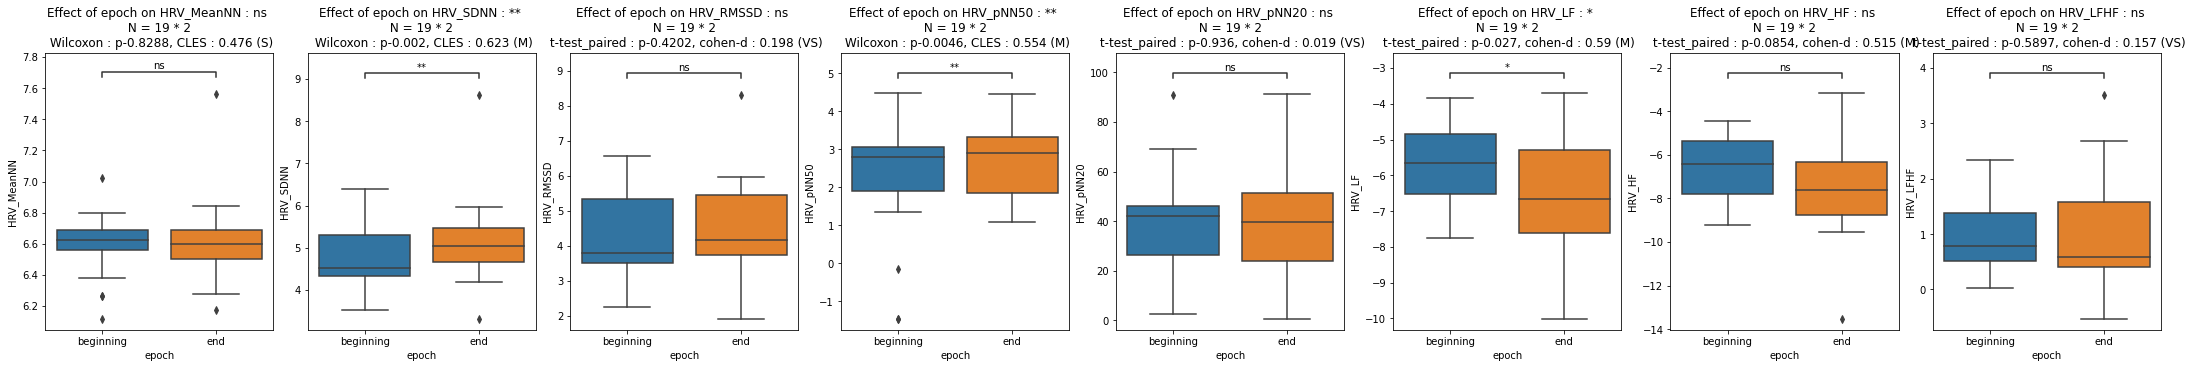

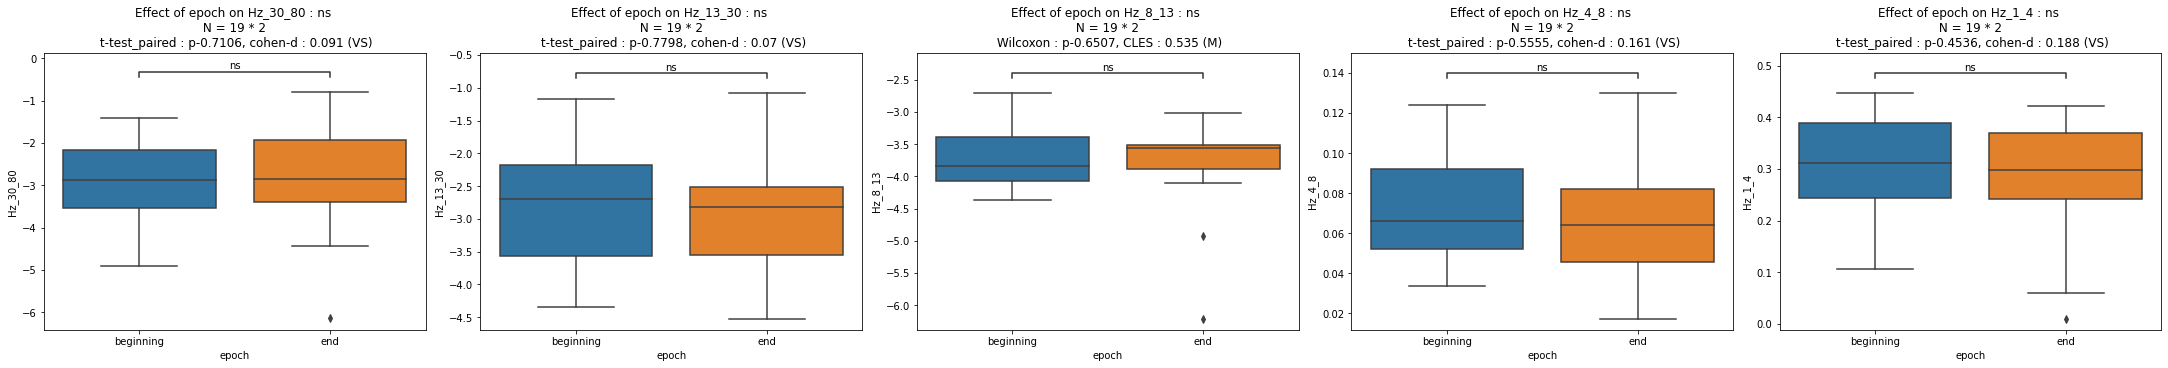

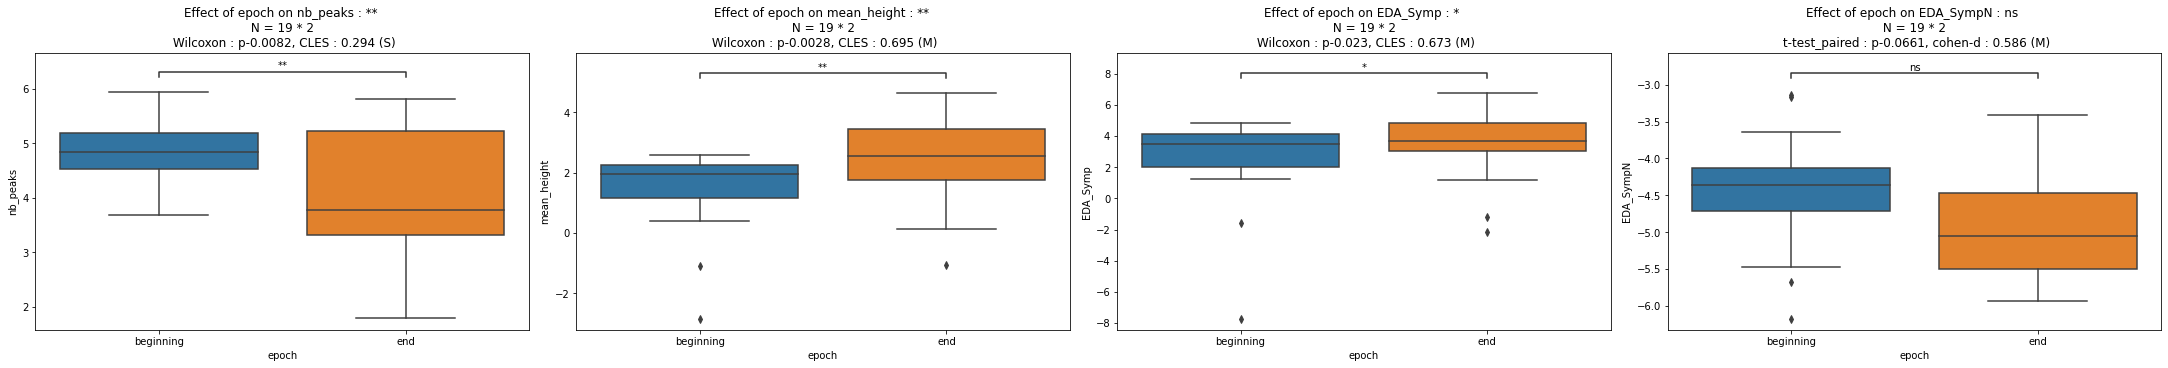

In [41]:
for dtype in ['ecg','eeg','eda']:
    fig, axs = plt.subplots(ncols = len(outcomes[dtype]), figsize = (30,5), constrained_layout = True)
    for col, outcome in enumerate(outcomes[dtype]):
        ax = axs[col]
        gh.auto_stats(df=load_visit_effect(dtype), predictor = 'epoch' , outcome = outcome, design = 'within', ax=ax)

Sujets + relaxés en fin qu'en début (15 min window) car + HRV (+ SDNN & pNN50) en fin qu'en début et - EDA peaks en fin qu'en début

In [64]:
load_visit_effect('ecg').groupby('epoch').median()

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_pNN20,HRV_LF,HRV_HF,HRV_LFHF
epoch,,,,,,,,
beginning,753.411567,91.783850,44.629065,16.440831,42.291491,0.003487,0.001620,2.210128
end,735.656301,154.320915,65.089921,18.081181,39.574091,0.001286,0.000489,1.793772


Un-successfull transformation
Un-successfull transformation


/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:2594: RuntimeWarning: invalid value encountered in subtract
  numer = (Ntot - k) * np.sum(Ni * (Zbari - Zbar)**2, axis=0)
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:2599: RuntimeWarning: invalid value encountered in subtract
  dvar += np.sum((Zij[i] - Zbari[i])**2, axis=0)


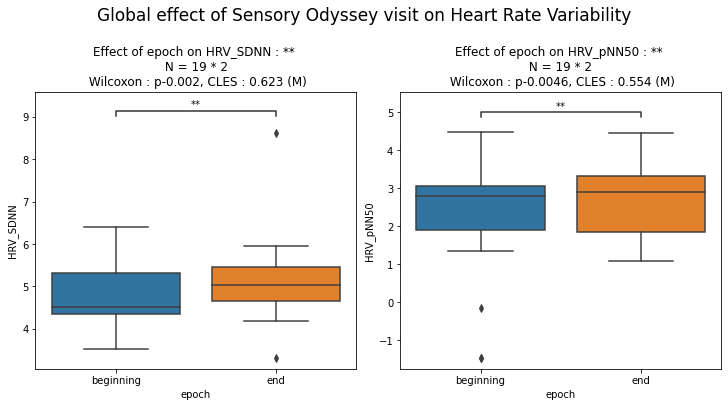

In [69]:
fig , axs = plt.subplots(ncols = 2, figsize = (10,5) , constrained_layout = True)
fig.suptitle('Global effect of Sensory Odyssey visit on Heart Rate Variability', fontsize = 17, y = 1.1)
for col, metric in enumerate(['HRV_SDNN','HRV_pNN50']):
    ax = axs[col]
    gh.auto_stats(df=load_visit_effect('ecg'), predictor = 'epoch' , outcome = metric, design = 'within', ax=ax, transform = True)

if savefig:
    plt.savefig('../figures/hrv_stats', bbox_inches = 'tight')

/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact 

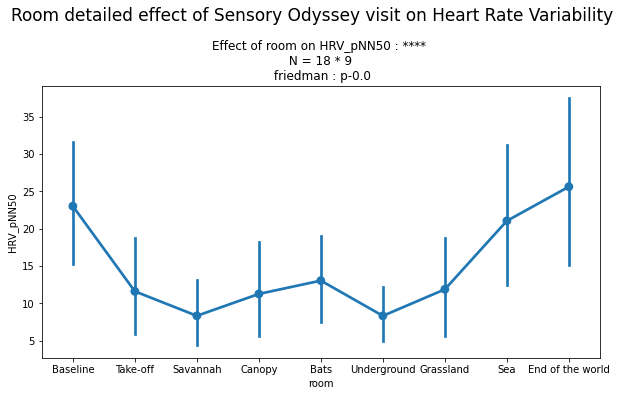

In [73]:

title = gh.auto_stats(df=ecg_metrics, predictor = 'room', outcome = 'HRV_pNN50', subject = 'participant', transform = False).get_title()
plt.close()

fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('Room detailed effect of Sensory Odyssey visit on Heart Rate Variability', fontsize = 17, y = 1.1)
sns.pointplot(data=ecg_metrics, x='room',y='HRV_pNN50', ax=ax)
ax.set_title(title)
if savefig:
    plt.savefig('../figures/room_hrv_stats', bbox_inches = 'tight')